In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (12,8) # set figure size

# Simulation data
## We carry out simulation studies to investigate the behaviors of p-values. Consider a two group test, where each group has n=100 samples. Each sample in the first group follows N(0,1) and each sample in the second group follows N(μ, 1). The following code simulate one dataset with μ = 0.5

In [7]:
np.random.seed(100)
def WaldTest(x1, x2):
    n1, n2 = len(x1), len(x2)
    Mu1, Mu2 = np.mean(x1), np.mean(x2)
    Var1, Var2 = np.mean((x1-Mu1)**2), np.mean((x2-Mu2)**2)
    Theta = Mu2 - Mu1
    SE = np.sqrt(Var1/n1 + Var2/n2)
    W = Theta/SE
    Pvalue = chi2.sf(W**2, df=1)
    return Pvalue

mu = 0.5
n = 100
x1 = np.random.normal(0, 1, size=n)
x2 = np.random.normal(mu, 1, size=n)
WaldTest(x1, x2)

0.00020838453277230432

# P-values under the null hypothesis
## Now we generate 1000 datasets with μ = 0 and check the distribution of p-values. How does it look like?

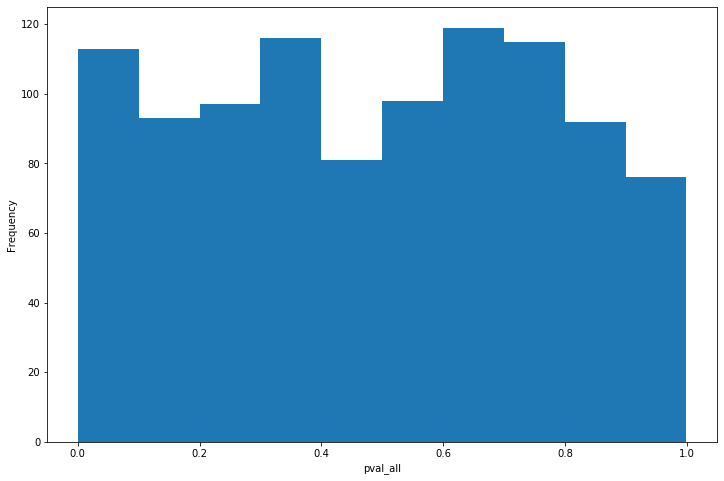

In [8]:
mu = 0
nSIM = 1000
pval_all = np.zeros(nSIM)
for i in range(nSIM):
    x1 = np.random.normal(0, 1, size=n)
    x2 = np.random.normal(mu, 1, size=n)
    pval_all[i] = WaldTest(x1, x2)
    
plt.hist(pval_all, bins=10)
plt.xlabel('pval_all')
plt.ylabel('Frequency');

## Type I error rates
If we use α = 0.05 as a cutoff, how many p-valus are significant?  
How about changing it to α = 0.05/10, 0.05/1000?

In [11]:
print(sum(pval_all < 0.05))
print(sum(pval_all < 0.05/10))
print(sum(pval_all < 0.05/1000))

54
8
1


# Power
## Researchers decide to use α = 0.05/1000, the bonferroni corrected alpha of testing 1000 hypothesis, as the cutoff. Now researchers want to check how the power changes by μ. Carry out simulation studies with μ = 0, 0.1, ..., 1

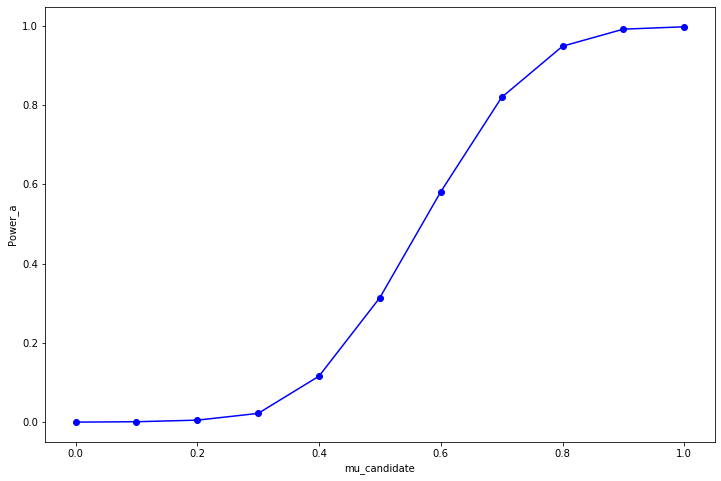

In [12]:
mu_candidate = np.arange(11)/10
nSIM = 1000
cutoff = 0.05/1000
Power_a = np.zeros(11)
for j in range(11):
    pval_all = np.zeros(nSIM)
    mu = mu_candidate[j]
    for i in range(nSIM):
        x1 = np.random.normal(0, 1, size=n)
        x2 = np.random.normal(mu, 1, size=n)
        pval_all[i] = WaldTest(x1, x2)
    Power_a[j] = np.mean(pval_all < cutoff)
plt.plot(mu_candidate, Power_a, 'bo-')
plt.xlabel('mu_candidate')
plt.ylabel('Power_a');

# Permutation test
## Using the same simulation approach with μ = 0.4 carry out a permutation test with B=10000

In [23]:
# np.random.seed(10)
mu = 0.4
n = 100
x1 = np.random.normal(0, 1, size=n)
x2 = np.random.normal(mu, 1, size=n)
x = np.hstack([x1, x2])
T_org = np.mean(x1) - np.mean(x2)
# Permutation test
B = 10000
T_permu = np.zeros(B)
for i in range(B):
    idx_1 = np.random.choice(2*n, size=100, replace=False)
    mu1 = np.mean(x[idx_1])
    mu2 = np.mean(np.delete(x, idx_1))
    T_permu[i] = mu1 - mu2

pval = (np.sum(T_permu**2 >= T_org**2) + 1)/(B+1)
pval

0.04079592040795921

In [24]:
WaldTest(x1, x2)

0.04020441064230408